In [ ]:
!pip install missingno==0.5.2
!pip install vaderSentiment==3.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

#USAR REGRESSÃO LOGÍSTICA, MÁQUINA DE VETORES DE SUPORTE (SVM) e RF

productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
dtype: int64


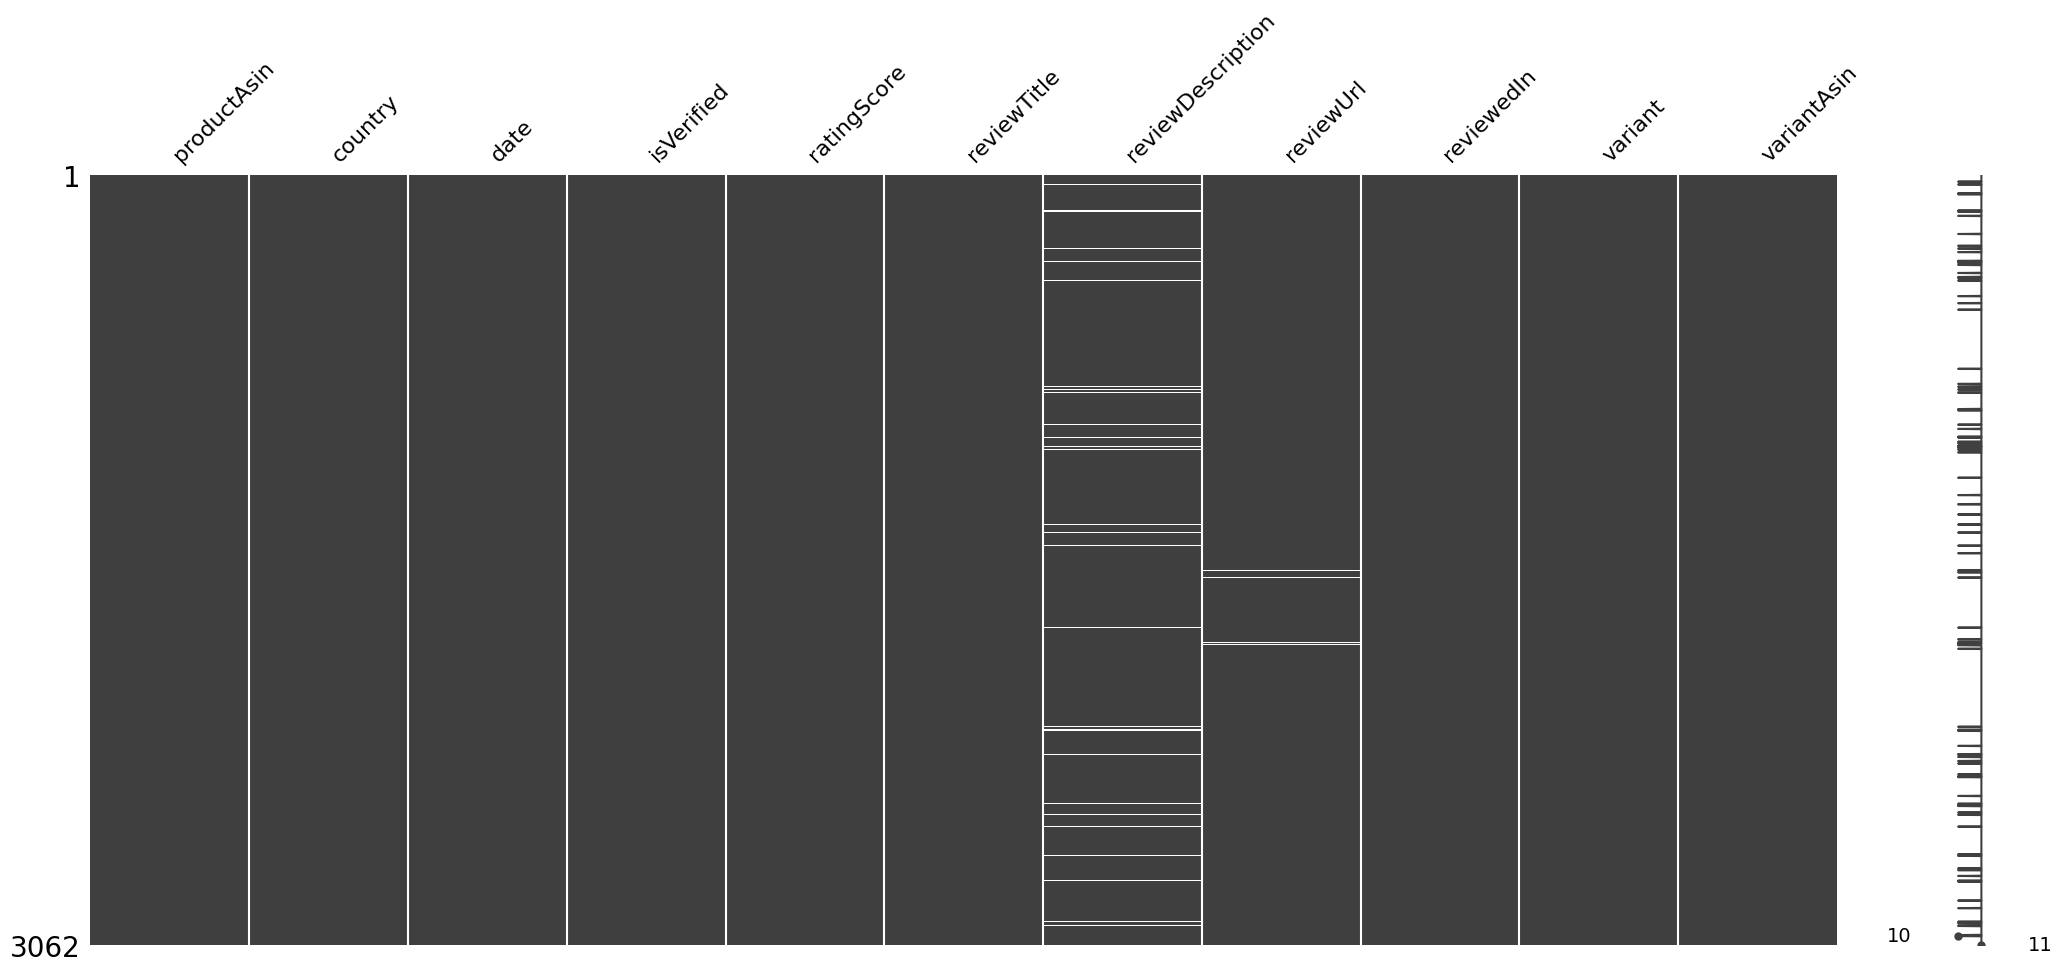

In [ ]:
data = pd.read_csv('/content/iphone.csv')
data.head()

#obtendo informações sobre o dataset
data.describe()
print(data.isnull().sum())
data.head()

#verificando onde os valores ausentes estão localizados
msno.matrix(data)
plt.show()

In [ ]:
#removendo registros sem descrição de review
data = data.dropna()

reviews = data['reviewDescription']

len(reviews)

data_reviews = pd.DataFrame(reviews)
data_reviews.head()

data_reviews.to_csv('reviews.csv')



In [ ]:
import nltk
nltk.download('stopwords')
import re

from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#pré-processando os dados
def preprocessing(texto):
    # Remove emotes
    emote_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    texto = emote_pattern.sub(r'', texto)
    texto = re.sub(r'http\S+', '', texto)
    texto = re.sub(r'@\w+', '', texto)
    texto = re.sub(r'#', '', texto)
    texto = re.sub(r'[^\w\s]', '', texto)

    stopwords_list = set(stopwords.words())
    words = texto.split()
    words = [word for word in words if word.lower() not in stopwords_list]
    text_with_no_stopwords = " ".join(words)


    return text_with_no_stopwords

def sentimentClassification(text):
  value = SentimentIntensityAnalyzer().polarity_scores(text)

  if value['compound'] > 0:
    return 'positive'

  elif value['compound'] == 0:
    return 'neutral'

  elif value['compound'] < 0:
    return 'negative'


df_reviews = pd.read_csv('/content/reviews.csv')

df_reviews['reviewDescription'] = df_reviews['reviewDescription'].apply(preprocessing)
df_reviews['sentiment'] = df_reviews['reviewDescription'].apply(sentimentClassification)

df_reviews.to_csv('reviews_sentiment.csv')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

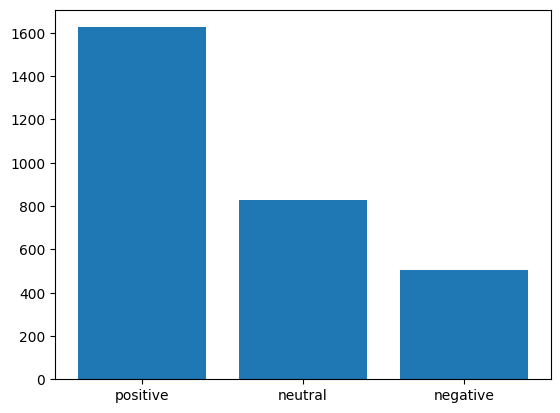

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_sentiment = pd.read_csv('/content/reviews_sentiment.csv')
df_sentiment['sentiment'].value_counts()

plt.bar(df_sentiment['sentiment'].value_counts().index, df_sentiment['sentiment'].value_counts())

plt.show()



In [ ]:
dataset_iphone = pd.read_csv('/content/iphone.csv')
dataset_iphone = dataset_iphone.dropna()
dataset_iphone['sentiment'] = df_sentiment['sentiment']

dataset_iphone.to_csv('iphone_sentiment.csv')

iphone_sentiment = pd.read_csv('/content/iphone_sentiment.csv')
iphone_sentiment.tail()

,Unnamed: 0,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,sentiment
2955,3057,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,NaN
2956,3058,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,NaN
2957,3059,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,NaN
2958,3060,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,NaN
2959,3061,B09G9D8KRQ,India,11-11-2023,True,1,Batter power needs to be improved,Battery power is be very bad need to chat on d...,https://www.amazon.in/gp/customer-reviews/R2QO...,Reviewed in India on 11 November 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,NaN


In [ ]:

df_iphone = pd.read_csv('/content/iphone_sentiment.csv')
df_iphone.tail()

df_iphoneNoNa = df_iphone.dropna()

df_iphoneNoNa.tail()

df_iphoneNoNa.to_csv('iphone_reviews_sentiment.csv')

